# Bangzhu Zhu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [78]:
data = pd.read_csv("price2015.csv",parse_dates=['Date'])
Date_col = data.pop('Date')
close = data.copy()
close.index = Date_col

# (a)

In [13]:
close.loc[close['AAPL'].idxmax()]

AAPL    228.523819
CVX     120.427116
IBM     146.073898
XOM      82.368942
GS      223.532120
BA      383.929626
TEVA     21.610001
CME     171.733734
Name: 2018-10-03 00:00:00, dtype: float64

AAPL was at highest price of 228.523819 at 2018-10-03.

# (b)

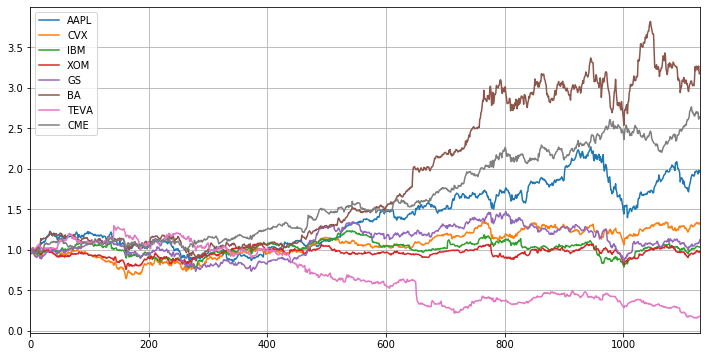

In [81]:
net_returns = data / data.shift(1) - 1
gross_returns = (1 + net_returns).cumprod()
daily_cr = gross_returns.copy()
daily_cr.plot(figsize=(12,6))
plt.grid()

In [139]:
daily_cr.loc[[1129],'AAPL']

1129    1.956916
Name: AAPL, dtype: float64

In [141]:
a=100*1.956916
a

195.69160000000002

so my wealth would be 195 if I invested 100 in AAPL.

# (c)

In [87]:
corrs=net_returns.corr()
corrs.unstack().sort_values(ascending=False).drop_duplicates()

CME   CME     1.000000
CVX   XOM     0.771918
GS    BA      0.490359
      CME     0.475419
      XOM     0.465222
                ...   
TEVA  BA      0.220951
      AAPL    0.204205
      XOM     0.201775
      CVX     0.185239
CME   TEVA    0.108147
Length: 29, dtype: float64

In [33]:
###so the top four correlated stocks is (CVX,XOM),(GS,BA),(GS,CME),(GS,XOM) 

Text(0.5, 1.0, 'scatter')

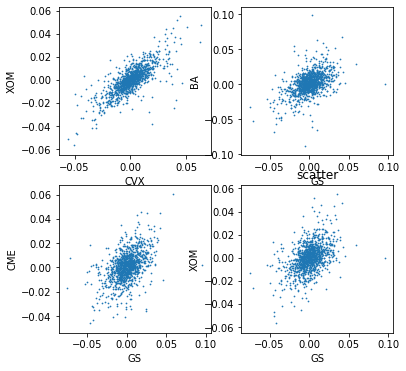

In [91]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.scatter(net_returns["CVX"],net_returns["XOM"],s=0.5)
plt.xlabel("CVX")
plt.ylabel('XOM')
plt.subplot(2,2,2)
plt.scatter(net_returns["GS"],net_returns["BA"],s=0.5)
plt.xlabel("GS")
plt.ylabel('BA')
plt.subplot(2,2,3)
plt.scatter(net_returns["GS"],net_returns["CME"],s=0.5)
plt.xlabel("GS")
plt.ylabel('CME')
plt.subplot(2,2,4)
plt.scatter(net_returns["GS"],net_returns["XOM"],s=0.5)
plt.xlabel("GS")
plt.ylabel('XOM')
plt.title("scatter")

# (d)

In [113]:
import pylab
import statsmodels.api as sm
import scipy.stats as stats

((array([-3.23266032, -2.97011173, -2.82376923, ...,  2.82376923,
          2.97011173,  3.23266032]),
  array([101.010941, 102.628273, 103.016602, ..., 162.806   , 162.832886,
         163.074905])),
 (11.235109811777406, 134.51094077079645, 0.9893579769226771))

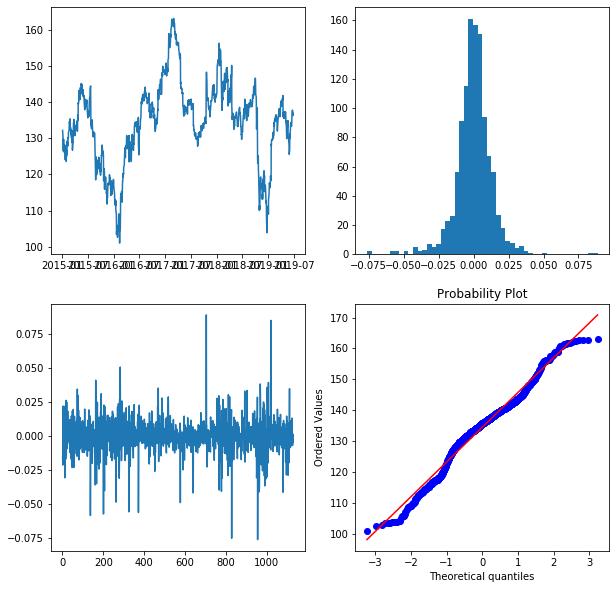

In [130]:
plt.figure(figsize=(10,10))
measure = np.random.normal(loc=20,scale=5,size=10)
plt.subplot(2,2,1)
plt.plot(close['IBM'])
plt.subplot(2,2,2)
plt.hist(net_returns['IBM'],bins=50)
plt.subplot(2,2,3)
plt.plot(net_returns['IBM'])
plt.subplot(2,2,4)
stats.probplot(data.IBM,dist='norm',plot=pylab)